# 1. 直线管道单位长度扬程损失和90度弯头扬程损失

达西–威斯巴哈方程式（英语：Darcy–Weisbach equation）是流体力学中的唯象方程式，得名自物理学家亨利·达西和尤利乌斯·威斯巴哈，此方程式描述固定长度管路内因摩擦力产生的扬程损失（或称为压强损失）和管路中的平均流速的关系：

$$h_f=\frac{fLv^2}{2gD}$$

$h_f$:摩擦力造成的扬程损失(m);

$f$:摩擦因子，可以通过雷诺数和相对粗糙度计算;

$L$:管道长度(m);

$v$:水流速度(m/s);

$g$:重力加速度(9.81 m/s²);

$D$:管道直径(m).

$$h_f=K\frac{v^2}{2g}$$

$h_f$:90度转弯处的扬程损失(m)

$K$:90度弯头的损失系数(1.5~2.5)

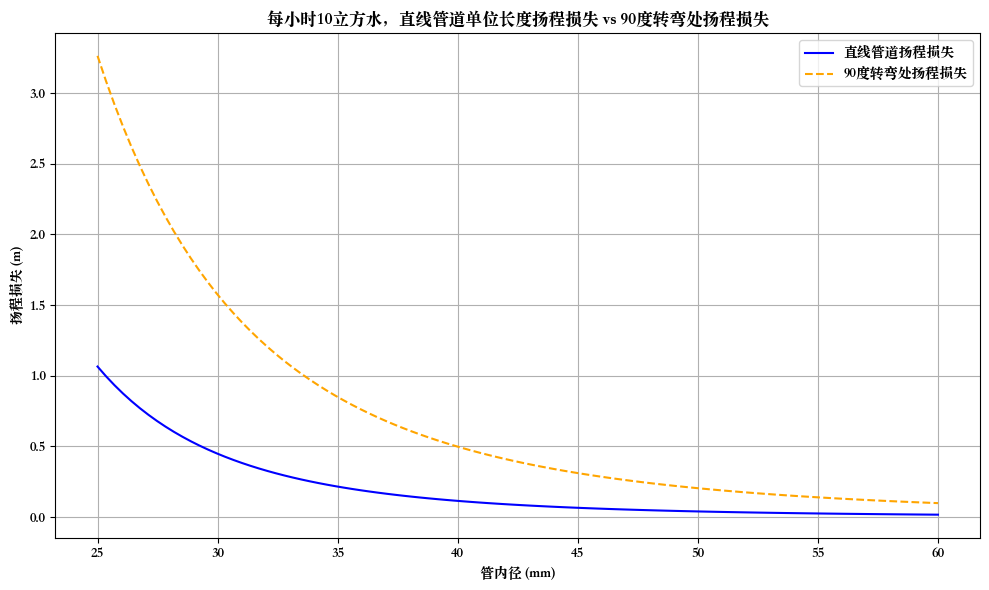

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Songti SC']  # macOS 上的默认中文字体
plt.rcParams['axes.unicode_minus'] = False

# 定义常数
flow_rate_m3_h = 10  # 流量 (m³/h)
loss_coefficient_90 = 2  # 90度弯头损失系数 (常用范围1.5-2.5)
pipe_length_m = 1  # 管道长度 (m)
gravity = 9.81  # 重力加速度 (m/s²)
kinematic_viscosity = 1e-6  # 水的运动粘度 (m²/s) （假设20°C）
title_text = '每小时' + str(flow_rate_m3_h) + '立方水，直线管道单位长度扬程损失 vs 90度转弯处扬程损失'

# 管道直径范围 (mm)
diameters_mm = np.linspace(25, 60, 100)

# 转换流量单位
flow_rate_m3_s = flow_rate_m3_h / 3600  # 流量 (m³/s)

# 计算流速和扬程损失
straight_losses = []
bend_losses = []

for diameter_mm in diameters_mm:
    diameter_m = diameter_mm / 1000  # 转换直径为米
    area_m2 = np.pi * (diameter_m / 2) ** 2  # 管道截面积 (m²)
    velocity_m_s = flow_rate_m3_s / area_m2  # 计算流速 (m/s)
    reynolds_number = (velocity_m_s * diameter_m) / kinematic_viscosity  # 计算雷诺数
    
    # 计算摩擦因子 (使用Blasius方程, 适用于湍流, Re > 4000)
    if reynolds_number > 4000:
        friction_factor = 0.3164 / (reynolds_number ** 0.25)
    else:
        friction_factor = 0  # 非湍流情况, 设置摩擦因子为0

    # 计算直线管道单位长度的扬程损失
    hf_straight = (friction_factor * pipe_length_m * velocity_m_s ** 2) / (2 * gravity * diameter_m)
    straight_losses.append(hf_straight)
    
    # 计算90度转弯处的扬程损失
    hf_90_deg = loss_coefficient_90 * (velocity_m_s ** 2) / (2 * gravity)
    bend_losses.append(hf_90_deg)

# 绘制曲线图
plt.figure(figsize=(10, 6))

# 直线管道单位长度扬程损失曲线
plt.plot(diameters_mm, straight_losses, label='直线管道扬程损失', linestyle='-', color='blue')

# 90度转弯处扬程损失曲线
plt.plot(diameters_mm, bend_losses, label='90度转弯处扬程损失', linestyle='--', color='orange')

plt.xlabel('管内径 (mm)')
plt.ylabel('扬程损失 (m)')
plt.title(title_text)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. 不同管径下，流量与流速的关系

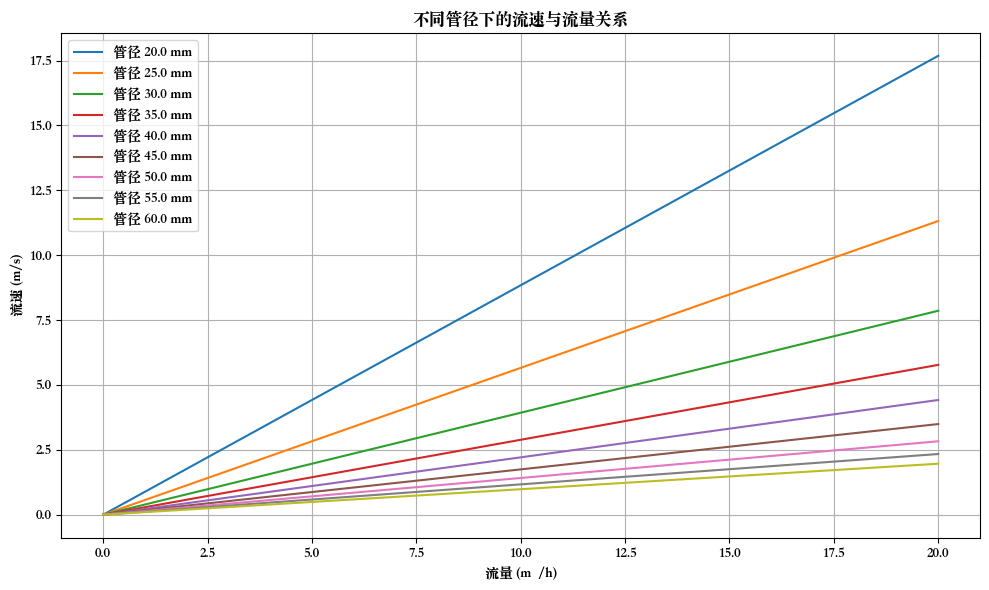

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 定义常数
flow_rates_m3_h = np.linspace(0, 20, 10)  # 流量范围：0到20立方每小时
diameters_mm = np.linspace(20, 60, 9)  # 管道内径范围：20到60mm
kinematic_viscosity = 1e-6  # 水的运动粘度 (m²/s) （假设20°C）

# 转换流量单位
flow_rates_m3_s = flow_rates_m3_h / 3600  # 流量 (m³/s)

# 计算流速
velocities_m_s = []
for flow_rate_m3_s in flow_rates_m3_s:
    for diameter_mm in diameters_mm:
        diameter_m = diameter_mm / 1000  # 转换直径为米
        area_m2 = np.pi * (diameter_m / 2) ** 2  # 管道截面积 (m²)
        velocity_m_s = flow_rate_m3_s / area_m2  # 计算流速 (m/s)
        velocities_m_s.append(velocity_m_s)

# 将结果重新整理为二维数组
velocities_m_s = np.array(velocities_m_s).reshape(len(flow_rates_m3_h), -1)

# 绘制曲线图
plt.figure(figsize=(10, 6))

# 绘制流速与流量的关系曲线
for i, diameter_mm in enumerate(diameters_mm):
    plt.plot(flow_rates_m3_h, velocities_m_s[:, i], label=f'管径 {diameter_mm} mm')

plt.xlabel('流量 (m³/h)')
plt.ylabel('流速 (m/s)')
plt.title('不同管径下的流速与流量关系')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()